In [1]:
import os
import cv2
import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
/home/johnson/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/johnson/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/johnson/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/johnson/anaconda3/lib/python3.6/site-packages/t

In [2]:
IMG_SIZE = 48
batch_size = 15
Numb_class = 6
epochs = 15

In [3]:
#loaddata
def loaddata():
    X = []
    Y = []

    path = glob('images/*/*.png')
    for img in tqdm(path):
        #print(img)
        image = cv2.imread(img.replace('\\','/'))
        draw = image.copy()
        draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
        image = cv2.resize(draw, (IMG_SIZE, IMG_SIZE))
        c = int(img.replace('\\','/').split('/', -1)[-2])
        y = np.zeros(Numb_class)
        y[c] = 1.
        X.append(image)
        Y.append(y)
    #print(X)
    X = np.array(X, dtype=np.uint8)
    Y = np.array(Y,dtype=np.float32)
    return X, Y

In [4]:
#loaddata()
x,y=loaddata()

100%|██████████| 14400/14400 [03:02<00:00, 78.86it/s] 


In [5]:
#print(x, y)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
print(len(X_train))
print(len(X_val))

11520
2880


In [7]:
def model():
    input = keras.Input(shape=(IMG_SIZE , IMG_SIZE, 3))
    x = keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu)(input)
    x = keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu)(x)
    x = keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu)(x)

    # 1er Maxpooling Et Normalisation
    x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Conv2D(128, (3, 3), padding='same', activation=keras.activations.relu)(x)
    x = keras.layers.Conv2D(128, (3, 3), padding='same', activation=keras.activations.relu)(x)
    x = keras.layers.Conv2D(128, (3, 3), padding='same', activation=keras.activations.relu)(x)

    x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation=keras.activations.relu)(x)
    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation=keras.activations.relu)(x)
    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation=keras.activations.relu)(x)
    
    # 2eme Maxpooling Et Normalisation
    x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation=keras.activations.relu)(x)
    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation=keras.activations.relu)(x)
    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation=keras.activations.relu)(x)

    #  4e Maxpooling Et Normalisation
    x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation=keras.activations.relu)(x)
    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation=keras.activations.relu)(x)
    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation=keras.activations.relu)(x)

    #  5e Maxpooling passe l'image a 8
    x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    #flatten
    x = keras.layers.Flatten()(x)

    x = keras.layers.Dense(64, activation=keras.activations.relu)(x)
    # Normalisation
    x = keras.layers.BatchNormalization()(x)

    output = keras.layers.Dense(Numb_class, kernel_initializer='uniform', activation=keras.activations.softmax)(x)

    return keras.Model(inputs=input, outputs=output)

In [8]:
def save_keras_model(model, filename):
    save_weights_path='./'+ filename +"_weights.h5"
    save_keras_modelh5_path='./'+ filename+'_h5' +".h5"
    save_model_jason_path='./'+filename+".json"

    # serialize model to JSON
    model_json = model.to_json()
    with open(save_model_jason_path, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(save_weights_path)
    model.save(save_keras_modelh5_path)


In [9]:
#X, Y =loaddata();
#X_test, Y_test, image=load_test();

In [10]:
model = model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       73856     
__________

In [11]:
sgd = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
adam=keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#history = model.fit(X_train, y_train, batch_size, epochs, verbose=1, validation_split=0.25, callbacks=callbacks_list)
history = model.fit(X_train, y_train, batch_size, epochs, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks_list)
save_keras_model(model, "modelfacial")

Train on 11520 samples, validate on 2880 samples
Epoch 1/15
11520/11520 [==============================] - 4908s 426ms/step - loss: 1.0553 - acc: 0.7082 - val_loss: 0.4163 - val_acc: 0.9458
Epoch 2/15


/home/johnson/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


11520/11520 [==============================] - 4901s 425ms/step - loss: 0.2926 - acc: 0.9643 - val_loss: 0.1470 - val_acc: 0.9910
Epoch 3/15
11520/11520 [==============================] - 4909s 426ms/step - loss: 0.1282 - acc: 0.9918 - val_loss: 0.0699 - val_acc: 0.9958
Epoch 4/15
11520/11520 [==============================] - 4912s 426ms/step - loss: 0.0767 - acc: 0.9963 - val_loss: 0.0451 - val_acc: 0.9965
Epoch 5/15
11520/11520 [==============================] - 4924s 427ms/step - loss: 0.0563 - acc: 0.9972 - val_loss: 0.0361 - val_acc: 0.9972
Epoch 6/15
11520/11520 [==============================] - 4970s 431ms/step - loss: 0.0408 - acc: 0.9985 - val_loss: 0.0288 - val_acc: 0.9972
Epoch 7/15
11520/11520 [==============================] - 5420s 471ms/step - loss: 0.0326 - acc: 0.9989 - val_loss: 0.0228 - val_acc: 0.9979
Epoch 8/15
11520/11520 [==============================] - 5220s 453ms/step - loss: 0.0246 - acc: 0.9999 - val_loss: 0.0200 - val_acc: 0.9983
Epoch 9/15
11520/11520 [

In [12]:
loss, acc = model.evaluate(X_val, y_val, verbose=0)
validation_data=(X_val, y_val)
print(loss, acc)
# evaluate the model
scores = model.evaluate(X_val, y_val, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


0.022754185010368626 0.9972222222222222
acc: 99.72%


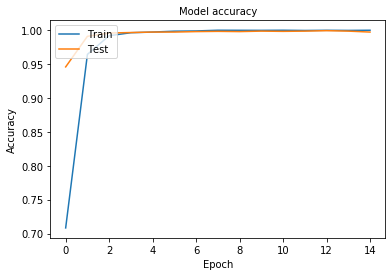

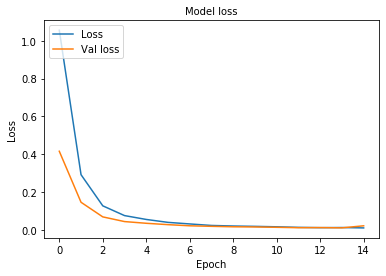

In [13]:
# Plot Accuracy & Epoch values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy', fontsize=10)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=10)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val loss'], loc='upper left')
plt.show()


# plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.suptitle('Optimizer : SGD\n', fontsize=10)
#plt.ylabel('Validation Loss', fontsize=9)
#plt.xlabel('Training Loss', fontsize=9)
#plt.legend(loc='upper right')
#plt.show()

#Save in weights and model
save_keras_model(model, 'model-keras')